# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
#Loading the dataset from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
h1b_jobs = pd.read_csv('/content/drive/MyDrive/Data Mining/Project/h1b-jobs-data.csv')

In [ ]:
h1b_jobs.head()

,Company Name,Job Title,Min Wage,Max Wage,Average Wage,Job Count
0,TRUIST BANK,SOFTWARE ENGINEER IV,163200,163200,163200.0,1
1,TRUIST BANK,SOFTWARE ENGINEERING DIRECTOR II,160961,160961,160961.0,1
2,TRUIST BANK,IT BUSINESS ANALYST III,158748,158748,158748.0,1
3,TRUIST BANK,SOFTWARE ENGINEERING DIRECTOR,141323,153731,146690.0,3
4,TRUIST BANK,LEAD INFRASTRUCTURE ENGINEER,146298,146298,146298.0,1


# Data Preprocessing

In [28]:
h1b_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20477 entries, 0 to 20476
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  20477 non-null  object 
 1   Job Title     20477 non-null  object 
 2   Min Wage      20477 non-null  int64  
 3   Max Wage      20477 non-null  int64  
 4   Average Wage  20477 non-null  float64
 5   Job Count     20477 non-null  int64  
 6   Category      20477 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
h1b_jobs.describe()

,Min Wage,Max Wage,Average Wage,Job Count
count,20477.000000,20477.000000,20477.000000,20477.000000
mean,132503.937149,139332.524003,135734.048519,2.611369
std,51081.872406,52646.720709,50954.698845,15.037157
min,25230.000000,25230.000000,25230.000000,1.000000
25%,95000.000000,101192.000000,98946.000000,1.000000
50%,124800.000000,131040.000000,128000.000000,1.000000
75%,160000.000000,170000.000000,165000.000000,2.000000
max,749998.000000,749998.000000,749998.000000,913.000000


In [ ]:
missing_values = h1b_jobs.isnull().sum()
missing_values

Company Name    0
Job Title       0
Min Wage        0
Max Wage        0
Average Wage    0
Job Count       0
dtype: int64

In [ ]:
h1b_jobs.dtypes

Company Name     object
Job Title        object
Min Wage          int64
Max Wage          int64
Average Wage    float64
Job Count         int64
dtype: object

# EDA

# Distribution of ***Minimum Wage***, ***Maximum Wage***, and ***Average Wage*** for ***H1B job offerings***

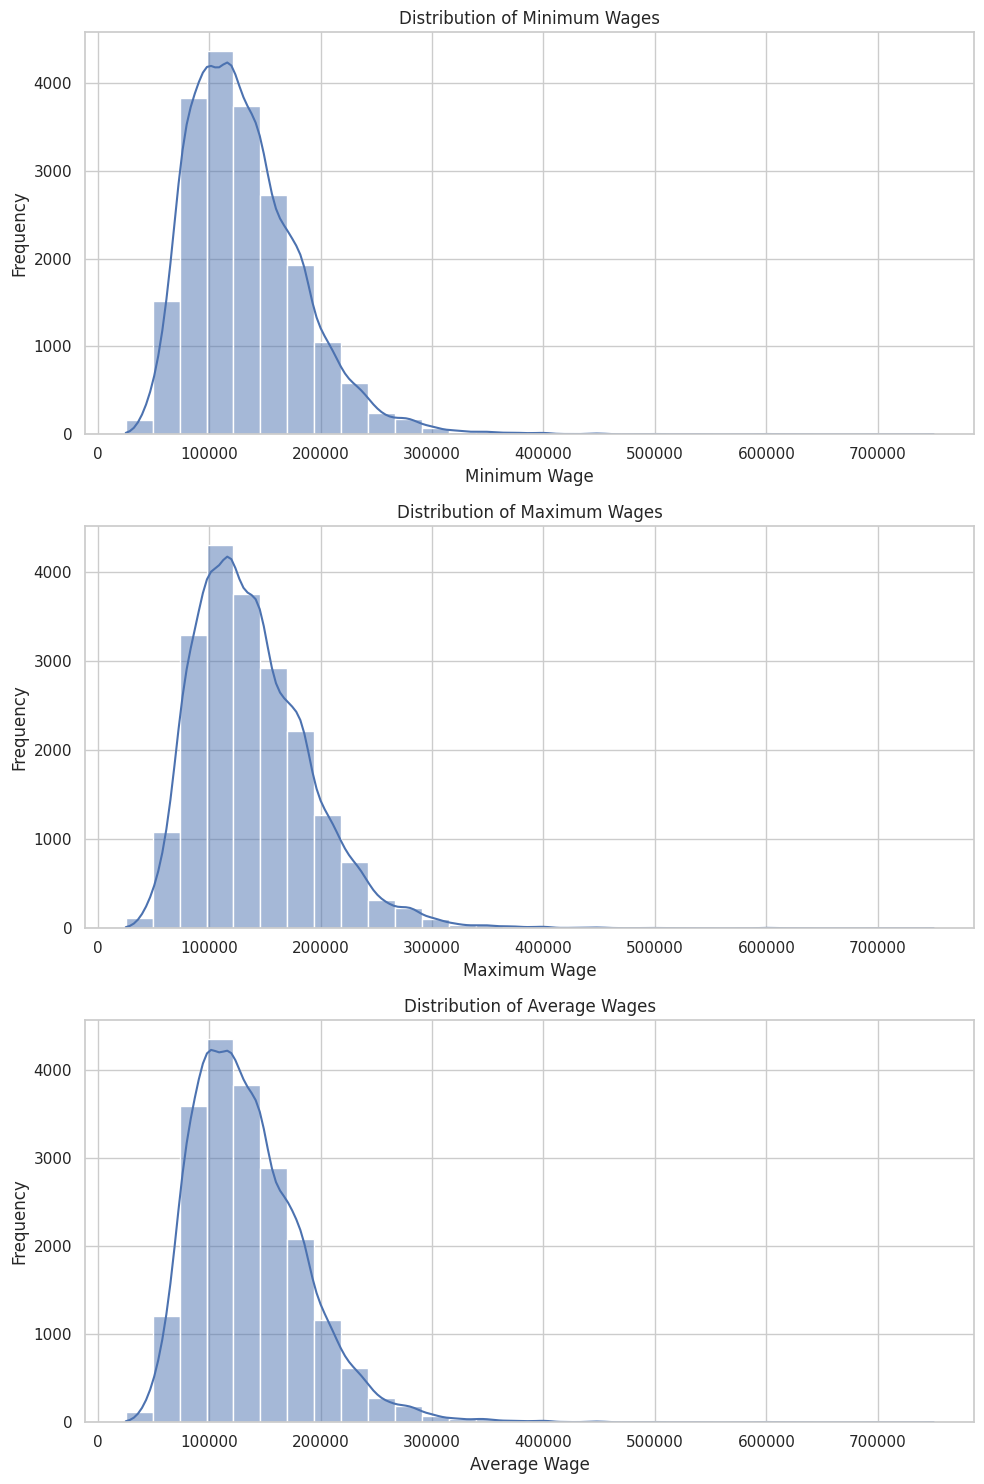

In [30]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(h1b_jobs['Min Wage'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Minimum Wages')
axes[0].set_xlabel('Minimum Wage')
axes[0].set_ylabel('Frequency')

# Distribution of Maximum Wage
sns.histplot(h1b_jobs['Max Wage'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Maximum Wages')
axes[1].set_xlabel('Maximum Wage')
axes[1].set_ylabel('Frequency')

# Distribution of Average Wage
sns.histplot(h1b_jobs['Average Wage'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Average Wages')
axes[2].set_xlabel('Average Wage')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The Histogram illustrates *how frequently different wage levels occur*:


1.  ***Minimum Wage Distribution***: Most of the jobs offer a minimum wage around the lower to middle range, with a sharp decrease as wage levels increase.

2.   ***Maximum Wage Distribution***: Similar to the minimum wages, but slightly more spread towards higher wages, indicating that some positions may offer significantly higher maximum wages.

3. ***Average Wage Distribution***: This plot combines the aspects of the first two, showing a more symmetrical distribution centered around the median wage range, but with a tail extending towards higher wages.









#  **Top 10 Companies by Number of Job Listings** and **the Top 10 Job Titles by Frequency**

<ipython-input-19-1af9e4b11a9f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_companies.index, x=top_companies.values, ax=axes[0], palette="coolwarm")
<ipython-input-19-1af9e4b11a9f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_job_titles.index, x=top_job_titles.values, ax=axes[1], palette="coolwarm")


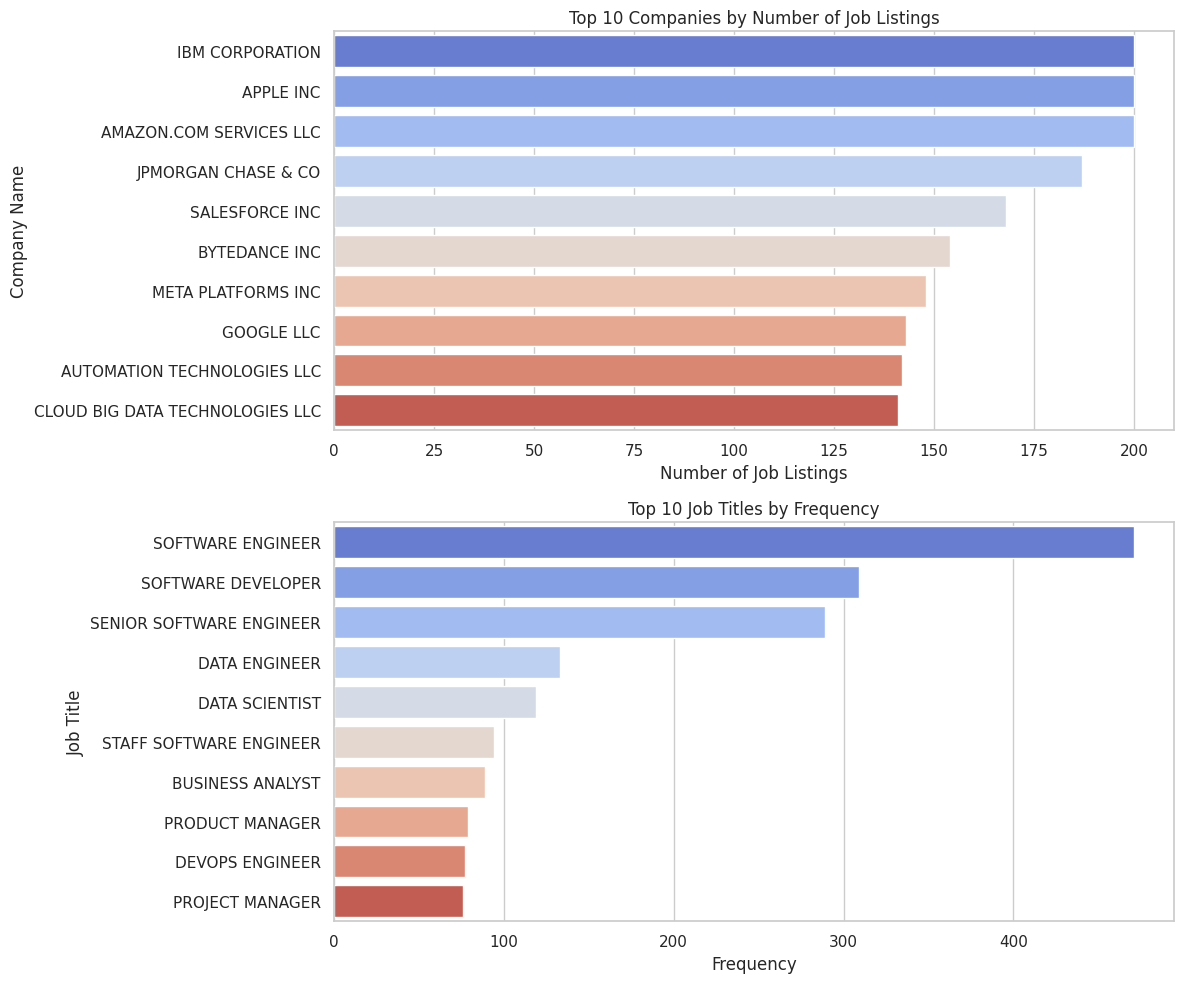

In [ ]:
# Top 10 companies by the number of job listings
top_companies = h1b_jobs['Company Name'].value_counts().head(10)

# Top 10 job titles by frequency
top_job_titles = h1b_jobs['Job Title'].value_counts().head(10)

# Plotting the top companies and job titles
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top companies plot
sns.barplot(y=top_companies.index, x=top_companies.values, ax=axes[0], palette="coolwarm")
axes[0].set_title('Top 10 Companies by Number of Job Listings')
axes[0].set_xlabel('Number of Job Listings')
axes[0].set_ylabel('Company Name')

# Top job titles plot
sns.barplot(y=top_job_titles.index, x=top_job_titles.values, ax=axes[1], palette="coolwarm")
axes[1].set_title('Top 10 Job Titles by Frequency')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Job Title')

plt.tight_layout()
plt.show()




1. **Top 10 Companies by Number of Job Listings**: The chart displays companies such as *IBM Corporation, Apple Inc, and Amazon.com Services LLC* among others, ranked by the number of H1B job listings they have. Each bar represents the number of job openings each company has, with *IBM Corporation* having the most.

2. **Top 10 Job Titles by Frequency**: This graph shows the most frequent job titles listed in the dataset. "*Software Engineer*" appears as the most common role, followed by "*Software Developer*" and "*Senior Software Engineer*", indicating a high demand for these positions in the technology sector.



# **Correlation Analysis** Between **Wages** and **Job Count**

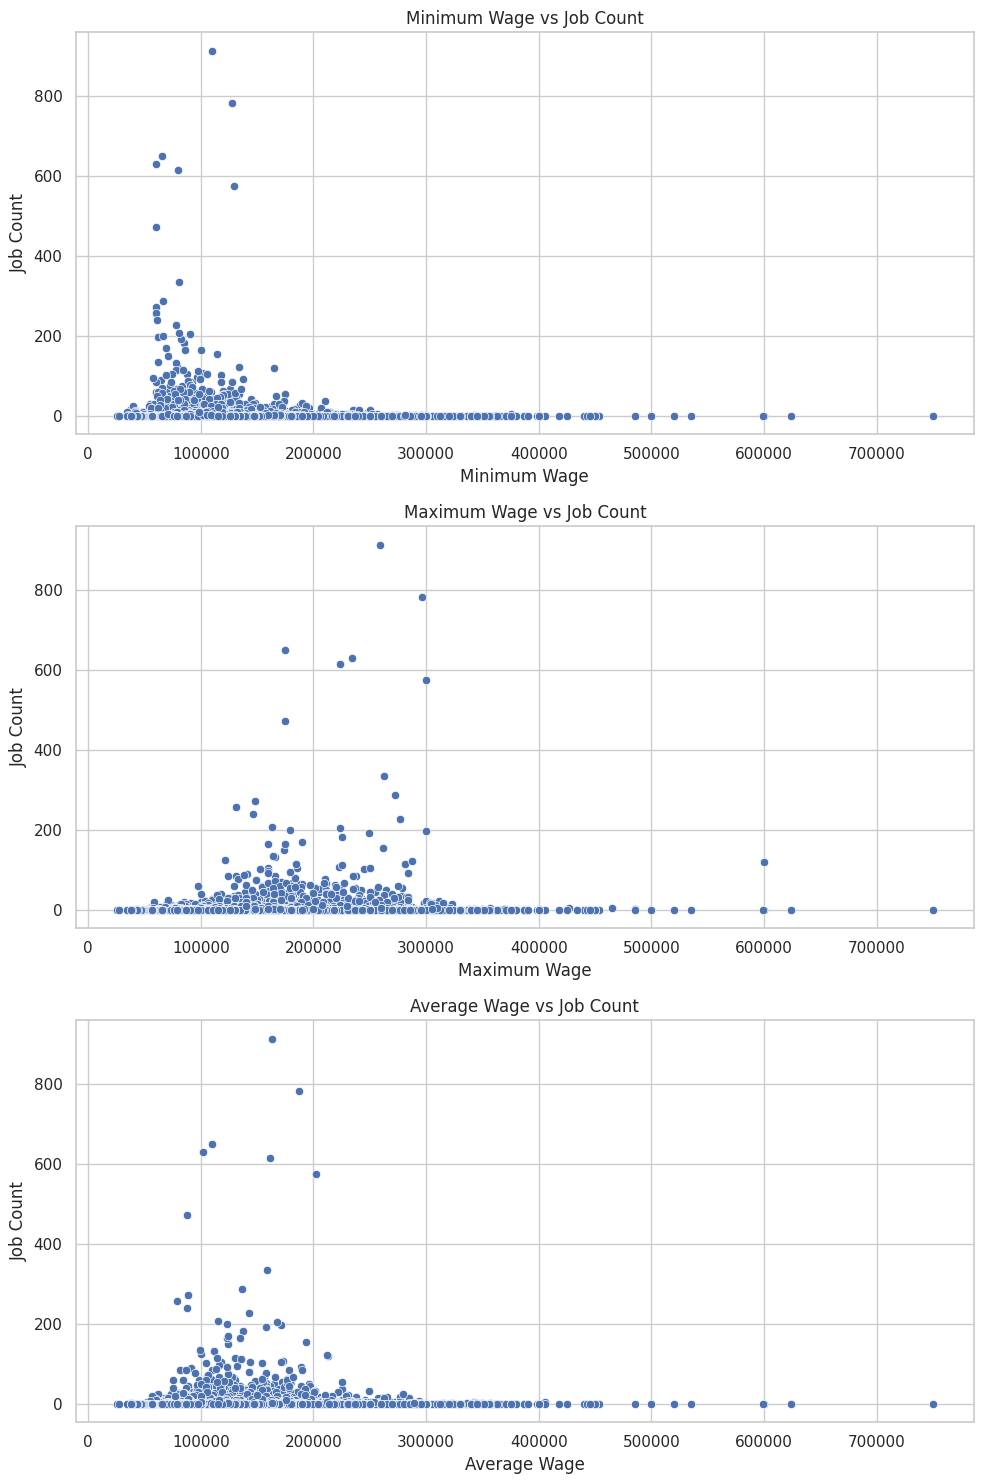

(-0.06424659564802457, 0.08940703234020546, -0.00036090914298707885)

In [ ]:
# Plotting scatter plots to see the correlation between wages and job count
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Minimum Wage vs Job Count
sns.scatterplot(data=h1b_jobs, x='Min Wage', y='Job Count', ax=axes[0])
axes[0].set_title('Minimum Wage vs Job Count')
axes[0].set_xlabel('Minimum Wage')
axes[0].set_ylabel('Job Count')

# Maximum Wage vs Job Count
sns.scatterplot(data=h1b_jobs, x='Max Wage', y='Job Count', ax=axes[1])
axes[1].set_title('Maximum Wage vs Job Count')
axes[1].set_xlabel('Maximum Wage')
axes[1].set_ylabel('Job Count')

# Average Wage vs Job Count
sns.scatterplot(data=h1b_jobs, x='Average Wage', y='Job Count', ax=axes[2])
axes[2].set_title('Average Wage vs Job Count')
axes[2].set_xlabel('Average Wage')
axes[2].set_ylabel('Job Count')

plt.tight_layout()
plt.show()

# Calculating correlation coefficients
correlation_min = h1b_jobs['Min Wage'].corr(h1b_jobs['Job Count'])
correlation_max = h1b_jobs['Max Wage'].corr(h1b_jobs['Job Count'])
correlation_avg = h1b_jobs['Average Wage'].corr(h1b_jobs['Job Count'])

correlation_min, correlation_max, correlation_avg




1. **Minimum Wage vs Job Count**: Most data points are clustered at lower wage levels with higher job counts, showing a trend where jobs with lower minimum wages are more common.

2. **Maximum Wage vs Job Count**: Similar to the minimum wage plot, but with slightly more spread towards higher maximum wages, indicating that some jobs offer significantly higher maximum wages but tend to have fewer openings.

3. **Average Wage vs Job Count**: This plot also shows that jobs with average wages towards the lower end of the spectrum are more prevalent, but with some outliers at higher wage levels that have low job counts.



# **Average wages** for the **Top 10 companies** by **job count**

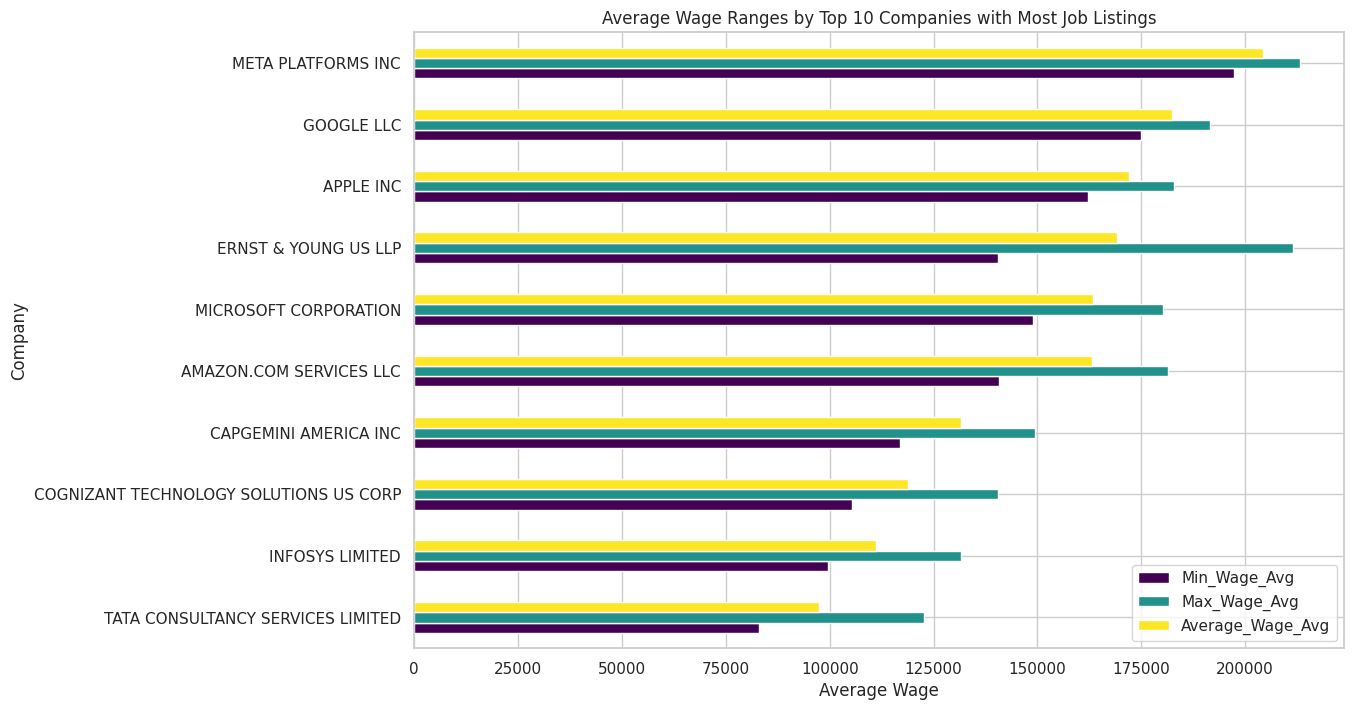

In [21]:
# Creating a grouped data frame to see average minimum, maximum, and average wages by company
company_wages = h1b_jobs.groupby('Company Name').agg(
    Min_Wage_Avg=('Min Wage', 'mean'),
    Max_Wage_Avg=('Max Wage', 'mean'),
    Average_Wage_Avg=('Average Wage', 'mean'),
    Job_Count_Total=('Job Count', 'sum')
).sort_values(by='Job_Count_Total', ascending=False).head(10)

# Plotting the average wages for the top 10 companies by job count
fig, ax = plt.subplots(figsize=(12, 8))
company_wages.sort_values(by='Average_Wage_Avg', ascending=True).plot(
    kind='barh',
    y=['Min_Wage_Avg', 'Max_Wage_Avg', 'Average_Wage_Avg'],
    ax=ax,
    colormap='viridis'
)
ax.set_title('Average Wage Ranges by Top 10 Companies with Most Job Listings')
ax.set_xlabel('Average Wage')
ax.set_ylabel('Company')
plt.show()


***Meta Platforms Inc*** and ***Google LLC*** are noticeable for having some of the *highest average wages* among these companies. The chart helps to *compare the wage competitiveness* of each company by visually displaying the wage spread (difference between average minimum and maximum wages) for each company. The variety in wage ranges across different companies might indicate differing levels of job roles or the competitive status of each company within the job market.

# **Average Wage** Ranges by **Top 10 Job Titles** with **Most Job Listings**

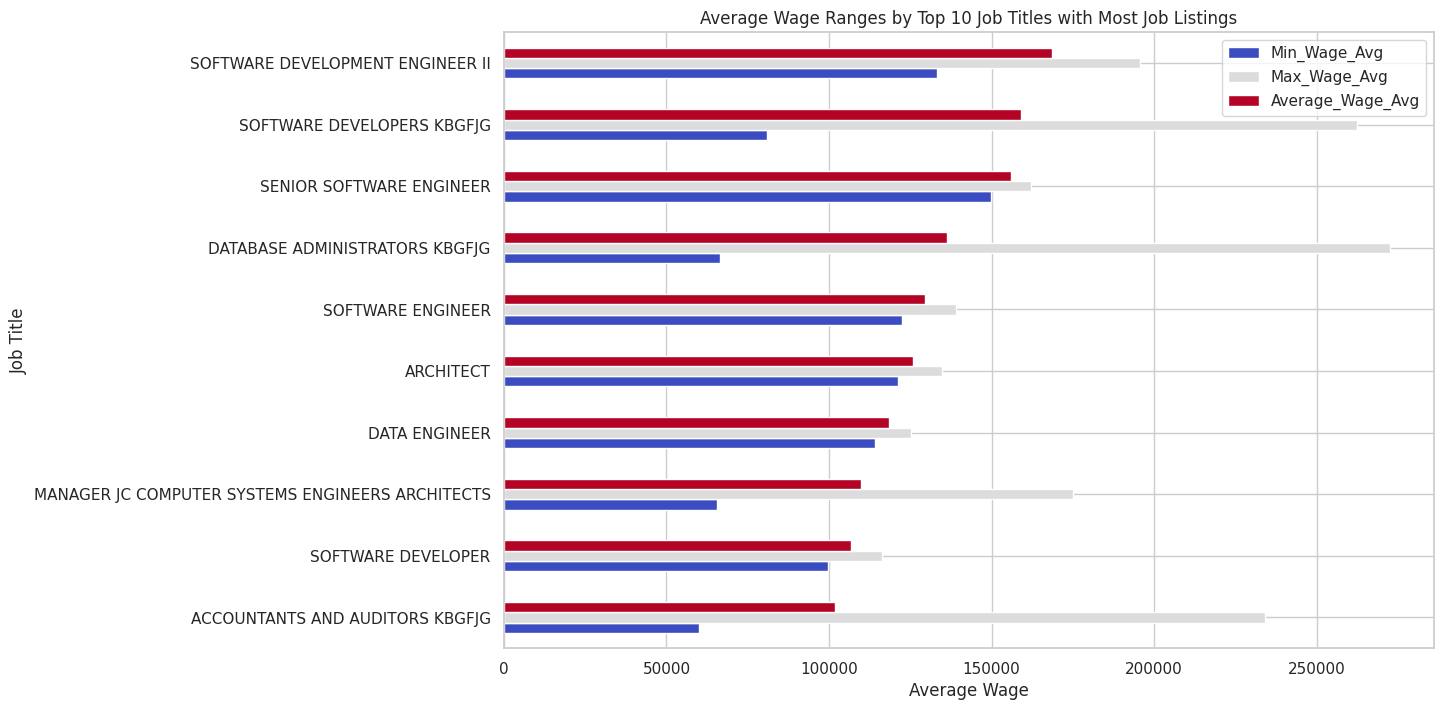

In [22]:
# Grouping data by job title to see average minimum, maximum, and average wages
job_title_wages = h1b_jobs.groupby('Job Title').agg(
    Min_Wage_Avg=('Min Wage', 'mean'),
    Max_Wage_Avg=('Max Wage', 'mean'),
    Average_Wage_Avg=('Average Wage', 'mean'),
    Job_Count_Total=('Job Count', 'sum')
).sort_values(by='Job_Count_Total', ascending=False).head(10)

# Plotting the average wages for the top 10 job titles by job count
fig, ax = plt.subplots(figsize=(12, 8))
job_title_wages.sort_values(by='Average_Wage_Avg', ascending=True).plot(
    kind='barh',
    y=['Min_Wage_Avg', 'Max_Wage_Avg', 'Average_Wage_Avg'],
    ax=ax,
    colormap='coolwarm'
)
ax.set_title('Average Wage Ranges by Top 10 Job Titles with Most Job Listings')
ax.set_xlabel('Average Wage')
ax.set_ylabel('Job Title')
plt.show()


The chart illustrates the variability between *minimum and maximum average* wages within the *same job roles*, highlighting the breadth of compensation that different professionals might expect within their respective positions. It shows that senior and specialized roles such as **"Senior Software Engineer," "Architect," and "Data Engineer"** *tend to command higher average wages compared to more general roles like* **"Software Engineer."** This visualization is useful for stakeholders to gauge which job titles are most lucrative and to understand potential wage progression within similar roles.

# **Top 10** combinations of **job titles & companies** based on **job count** (*showcasing which roles are most frequently listed and their respective average wages*)

In [23]:
# Grouping data by job title and company to see job counts and average wages
job_title_company = h1b_jobs.groupby(['Job Title', 'Company Name']).agg(
    Job_Count=('Job Count', 'sum'),
    Average_Wage=('Average Wage', 'mean')
).reset_index()

# Sorting the results to show top results based on job count
top_job_title_company = job_title_company.sort_values(by='Job_Count', ascending=False).head(10)

# Displaying the top job titles, their corresponding companies, job counts, and average wages
top_job_title_company


,Job Title,Company Name,Job_Count,Average_Wage
15886,SOFTWARE ENGINEER,MICROSOFT CORPORATION,913,163586.640745
15799,SOFTWARE ENGINEER,GOOGLE LLC,782,186923.347826
7401,MANAGER JC COMPUTER SYSTEMS ENGINEERS ARCHITECTS,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,650,109808.627692
90,ACCOUNTANTS AND AUDITORS KBGFJG,ERNST & YOUNG US LLP,629,101832.282989
15511,SOFTWARE DEVELOPMENT ENGINEER II,AMAZON.COM SERVICES LLC,614,161072.421824
15883,SOFTWARE ENGINEER,META PLATFORMS INC,575,202536.911304
654,ARCHITECT,TATA CONSULTANCY SERVICES LIMITED,473,87666.279070
15450,SOFTWARE DEVELOPERS KBGFJG,ERNST & YOUNG US LLP,336,159168.505952
3545,DATABASE ADMINISTRATORS KBGFJG,ERNST & YOUNG US LLP,289,136350.429066
11786,SENIOR ASSOCIATE JC COMPUTER SYSTEMS ENGINEERS...,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,272,88739.312500


The table highlights positions such as **"Software Engineer" at Microsoft Corporation and Google LLC**, which have ***high job counts of 913 and 782***, respectively, with corresponding high average wages. It also includes other roles like **"Architect" at Tata Consultancy Services Limited** and **"Accountants and Auditors" at Ernst & Young US LLP**, showcasing a variety of roles across different sectors.

# **Top 10 companies** with the **highest diversity of job titles** (*offered to H1B visa holders, along with their average wages and total job counts*)

In [24]:
# Grouping data by company to calculate the diversity of job titles and average wages
company_job_diversity = h1b_jobs.groupby('Company Name').agg(
    Unique_Job_Titles=('Job Title', 'nunique'),
    Average_Wage=('Average Wage', 'mean'),
    Total_Job_Count=('Job Count', 'sum')
).sort_values(by='Unique_Job_Titles', ascending=False).head(10)

# Displaying the results
company_job_diversity


,Unique_Job_Titles,Average_Wage,Total_Job_Count
Company Name,,,
APPLE INC,200,172011.476353,741
IBM CORPORATION,200,137925.421453,670
AMAZON.COM SERVICES LLC,200,163139.581507,2834
JPMORGAN CHASE & CO,187,154822.107307,672
SALESFORCE INC,168,190267.081444,513
BYTEDANCE INC,154,217334.749072,202
META PLATFORMS INC,148,204309.272398,1013
GOOGLE LLC,143,182315.971845,1181
AUTOMATION TECHNOLOGIES LLC,142,77966.633318,308


***Apple Inc, IBM Corporation, and Amazon.com Services LLC*** each offer around ***200 unique job titles***, with average wages varying significantly from company to company, and *Amazon notably having a much higher total job count of 2834*. The table also highlights other companies like ***ByteDance Inc and Meta Platforms Inc***, showing their respective unique job titles, average wages, and job counts, with ***ByteDance Inc having the highest average wage*** among the listed companies. This data provides insight into the breadth of employment opportunities and compensation levels across leading firms in the industry.




# **Wage Distribution** Across Different **Job Categories**

In [26]:
# Define keywords for each category
categories_keywords = {
    "Technology": ['software', 'engineer', 'developer', 'technology', 'tech', 'data', 'network', 'systems', 'IT'],
    "Finance": ['analyst', 'finance', 'financial', 'bank', 'accounting', 'economist'],
    "Healthcare": ['nurse', 'doctor', 'health', 'clinical', 'medical', 'pharma', 'pharmacist'],
    "Consulting": ['consultant', 'advisory'],
    "Management": ['manager', 'director', 'lead', 'executive', 'chief', 'vp', 'head']
}

# Function to determine the category of each job title
def categorize_job_title(job_title):
    categories = []
    for category, keywords in categories_keywords.items():
        if any(keyword.lower() in job_title.lower() for keyword in keywords):
            categories.append(category)
    return ', '.join(categories) if categories else 'Other'

# Assign categories to job titles
h1b_jobs['Category'] = h1b_jobs['Job Title'].apply(categorize_job_title)

# Group data by category and calculate wage statistics
category_wage_stats = h1b_jobs.groupby('Category').agg({
    'Average Wage': ['mean', 'median', 'min', 'max', 'count']
}).sort_values(by=('Average Wage', 'mean'), ascending=False)

category_wage_stats


Average Wage                 \
                                                      mean         median   
Category                                                                    
Technology, Management                       166331.190660  160000.000000   
Technology, Consulting, Management           158957.545455  155043.000000   
Management                                   158234.709845  150000.000000   
Healthcare, Management                       156872.148649  140000.000000   
Finance, Management                          155647.040201  148950.000000   
Technology, Finance, Management              153309.333333  144150.000000   
Technology, Finance, Consulting              147647.250000  129480.000000   
Technology, Healthcare, Management           143318.488889  135000.000000   
Consulting, Management                       136251.361301  134365.375000   
Finance, Healthcare, Management              134000.000000  134000.000000   
Technology                                   132958.128507  125598.333333   
Technology, Consulting                       123606.127642  122600.250000   
Other                                        123013.022686  110534.000000   
Consulting                                   115761.641213  108750.000000   
Technology, Healthcare                       112944.321429  101920.000000   
Technology, Finance                          110950.951583  106080.000000   
Finance, Consulting                          108434.900000  109922.500000   
Finance                                      106487.202715  100000.000000   
Finance, Healthcare                          105312.037037  102000.000000   
Healthcare                                   101041.472645   80000.000000   
Technology, Finance, Healthcare               97626.428571   96250.000000   
Healthcare, Consulting                        94500.000000   94500.000000   
Technology, Finance, Consulting, Management   93600.000000   93600.000000   

                                                                           \
                                                       min            max   
Category                                                                    
Technology, Management                        53383.500000  624000.000000   
Technology, Consulting, Management           117666.000000  223000.000000   
Management                                    38133.333333  600000.000000   
Healthcare, Management                        71500.000000  275000.000000   
Finance, Management                           70075.000000  500000.000000   
Technology, Finance, Management               88774.000000  312000.000000   
Technology, Finance, Consulting               96400.000000  323920.000000   
Technology, Healthcare, Management            53726.000000  290000.000000   
Consulting, Management                        95781.000000  215000.000000   
Finance, Healthcare, Management              134000.000000  134000.000000   
Technology                                    25230.000000  749998.000000   
Technology, Consulting                        49670.000000  225000.000000   
Other                                         35277.000000  535000.000000   
Consulting                                    62400.000000  267444.000000   
Technology, Healthcare                        52000.000000  207000.000000   
Technology, Finance                           38958.000000  276388.388889   
Finance, Consulting                           78600.000000  143541.000000   
Finance                                       35360.000000  342400.000000   
Finance, Healthcare                           68141.000000  145000.000000   
Healthcare                                    51917.000000  499200.000000   
Technology, Finance, Healthcare               62400.000000  134204.000000   
Healthcare, Consulting                        89000.000000  100000.000000   
Technology, Finance, Consulting, Management   93600.000000   93600.000000   

                                        

Categories such as **"Technology, Management" and "Technology, Consulting, Management"** showcase ***higher average wages***, indicative of high-value sectors. The table covers a range of combinations, reflecting how wage scales vary significantly depending on the intersection of specific fields and roles. For example, roles combining *technology and management aspects tend to offer higher wages, whereas standalone categories like "Finance" or "Consulting" present lower average wages*, highlighting the premium placed on interdisciplinary skills in the job market.